In [2]:
# Imports
from jabutiles.tile import Tile
from jabutiles.layer import Layer
from jabutiles.shade import Shade
from jabutiles.maskgen import MaskGen, ShapeMaskGen
from jabutiles.texture import TextureGen
from jabutiles.utils_img import display_image

# Constants
SCALE = 8       # Scale to display and export the image
S     = 24      # Generic dimension for the textures and masks
SIZE  = (S, S)
FORCE = 0.8     # Shade brightness

In [3]:
# Textures
tx1 = TextureGen.named_texture(SIZE, "dirt")
tx2 = TextureGen.named_texture(SIZE, "gravel")
tx3 = TextureGen.named_texture(SIZE, "grass")
# tx4 = TextureGen.named_texture(SIZE, "water.shallow")

tx1.scale(SCALE).save("docs/imgs/tx1_dirt.png")
tx2.scale(SCALE).save("docs/imgs/tx2_gravel.png")
tx3.scale(SCALE).save("docs/imgs/tx3_grass.png")

In [4]:
# Masks
mk1 = MaskGen.brick_pattern(SIZE, (10, 10), 2, 1).offset((-1, -1), "wrap")
mk2 = MaskGen.blob_draw(SIZE, [((S/2-0.5, S/2-0.5), S/2-3.5)]).invert()
mk3 = ShapeMaskGen.hexagonal(SIZE)

mk1.scale(SCALE).save("docs/imgs/mk1_brick.png")
mk2.scale(SCALE).save("docs/imgs/mk2_blob.png")
mk3.scale(SCALE).save("docs/imgs/mk3_shape.png")

In [5]:
# Shades
sh1 = Shade(1/FORCE, (-1, +1), "wrap", inverted=True)   # Darker corner
sh2 = Shade(FORCE, (-1, +1), "wrap")                    # Brick shadow
sh3 = Shade(FORCE, outline=2, dist=0.5, inverted=True)  # Enhance border
sh4 = Shade(FORCE, outline=2)                           # Occlusion

In [6]:
# Layers
ly1 = Layer(tx1)                # Base dirt texture, no mask
ly2 = Layer(tx2, mk1, sh1, sh2) # Stone brick over dirt
ly3 = Layer(tx3, mk2, sh3, sh4) # Grass growth over bricks
ly4 = Layer(None, mk3)          # Hexagonal tile cut

from PIL import Image
ly1.image.resize((S*SCALE, S*SCALE), Image.Resampling.NEAREST).save("docs/imgs/ly1_dirt.png")
ly2.image.resize((S*SCALE, S*SCALE), Image.Resampling.NEAREST).save("docs/imgs/ly2_path.png")
ly3.image.resize((S*SCALE, S*SCALE), Image.Resampling.NEAREST).save("docs/imgs/ly3_growth.png")

In [ ]:
# Interactions
(Tile([ly1, ly2])
    .image.resize((S*SCALE, S*SCALE), Image.Resampling.NEAREST)
    .save("docs/imgs/ly1_2.png"))

(Tile([ly1, ly2, ly3])
    .image.resize((S*SCALE, S*SCALE), Image.Resampling.NEAREST)
    .save("docs/imgs/ly1_2_3.png"))

(Tile([ly2, ly3])
    .image.resize((S*SCALE, S*SCALE), Image.Resampling.NEAREST)
    .save("docs/imgs/ly2_3.png"))

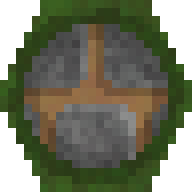

In [7]:
# Tile
tl1 = Tile([ly1, ly2, ly3, ly4])
display_image(tl1.image, SCALE)

In [8]:
tl1.image.resize((S*SCALE, S*SCALE), Image.Resampling.NEAREST).save("docs/imgs/logo.png")

Using cached image
